# Aula Prática 8 (guião)
### Semana de 7 de Novembro a 11 de Novembro de 2022
### José Carlos Ramalho e Luís Cunha
### Sinopsis:
Consolidação e aferição de tudo o que foi feito até ao momento. 

### Assunto: Frações
Vamos pensar num modelo: o que é uma fração estruturalmente?

In [1]:
# Modelo duma fração
f1 = (1,2)
# Modelo duma lista de frações
listaf = [(1,2), (3,2), (3,7)]

### Construtor

In [2]:
def criarFracao(numerador, denominador):
    return (numerador, denominador)

def verFracao(f):
    print(f[0],"/", f[1], end="  ", sep="")
    return

In [3]:
f1 = criarFracao(2,3)
verFracao(f1)

2/3  

In [4]:
def verlista(f):
    for i in f:
        verFracao(i)

verlista(listaf)

1/2  3/2  3/7  

### Simplificação de frações

In [5]:
def mdc(a,b):
    if a > b:
        menor = b
    else:
        menor = a
    for n in range(1,menor +1):
        if a % n == 0 and b % n == 0:
            mdc = n
    return mdc

mdc(15,10)

5

In [6]:
#another one :)

def mdcnovo (a,b):
    if a == b:
        return a
    if a > b:
        return mdcnovo(a-b, b)
    else:
        return mdcnovo(b-a, a)

mdcnovo(2,14)

2

In [7]:
def mdcoutro(x, y):
    while y != 0:
        (x, y) = (y, x % y)
    return x
print(mdcoutro(4,20))

def mdcresto(a,b):
    if a % b == 0:
        return b
    return mdcresto(b, a%b)
print(mdcresto(4,20))

4
4


In [8]:
def simplificarFracao(f):
    mmdc = mdcresto(f[0], f[1])
    simp = criarFracao(int(f[0]/mmdc), int(f[1]/mmdc))
    return simp

In [9]:
verFracao(simplificarFracao(criarFracao(21, 140)))

3/20  

## Operações sobre frações

In [10]:
def somarFrac(f1, f2):
        return simplificarFracao((f1[0]*f2[1]+f2[0]*f1[1],f1[1]*f2[1]))

f2 = criarFracao(5,7)
verFracao(somarFrac(f1,f2))

29/21  

In [11]:
listaFrac = [f1, f2, criarFracao(125,1000), (8,12)]
listaFrac2 = []
import random
for i in range(1,20):
    n = random.randrange(1, 10)
    d = random.randrange(2, 20)
    listaFrac2.append(criarFracao(n,d))
print(listaFrac2)

[(4, 12), (9, 12), (3, 15), (1, 9), (5, 13), (2, 8), (2, 13), (9, 11), (9, 10), (3, 16), (8, 18), (4, 2), (2, 8), (6, 10), (3, 17), (7, 13), (5, 2), (6, 11), (5, 16)]


### Soma uma lista de frações

In [13]:
def somarListaFrac(lista):
    res = lista[0]
    for f in lista[1:]:
        res = somarFrac(res, f)
    return res

somarListaFrac(listaf)

(5012881, 437580)

### Multiplica 2 frações

In [16]:
def multFrac(f1, f2):
    res = (f1[0]*f2[0], f1[1]*f2[1])
    return simplificarFracao(res)
multFrac((3,4), (5,2))

(15, 8)

### Guardar uma lista de frações num ficheiro

In [18]:
def gravaListaFrac(lista):
    file = open("fracoes.txt", "w")
    for f in lista:
        file.write(f"{f[0]}/{f[1]}\n")
        
    file.close() 

gravaListaFrac([(2,7), (4,3), (5,6)])

### Recuperar uma lista de frações dum ficheiro

In [23]:
def carregaListaFrac(fnome):
    lst = []
    file = open(fnome)
    for line in file:
        frac = line.split("/")
        frac[1] = frac[1].replace("\n", "")
        tup = (int(frac[0]), int(frac[1]))
        lst.append(tup)
    return lst

print(carregaListaFrac("fracoes.txt"))

[(2, 7), (4, 3), (5, 6)]


### TPC8: Teste de aferição

Resolva os problemas apresentados a seguir.

### tpc1.a) Recebe duas strings, _s1_ e _s2_, e retorna o comprimento da substring inicial de _s1_ que não contem nenhum caráter de _s2_:

In [58]:
def inicDiferente(s1, s2):
    lst1 = []
    lst2 = []
    lst = []
    for i in s1:
        if i != " " and i != ".":
            lst1.append(i.lower())
    for e in s2:
        if e != " " and e != ".":
            lst2.append(e.lower())
    for letter in lst1:
        if letter not in lst2:
            if letter not in lst:
                lst.append(letter)
    return len(lst)

inicDiferente("Está um bom dia...", "Hoje é um dia alegre.")
# resultado esperado: 4

4

### tpc1.b) Recebe um parâmetro _n_ e lê _n_ números inteiros; no fim retorna quantos dos números lidos são superiores à média dos números lidos:

In [17]:
import random
def acimaMedia(n):
    res = 0
    sum = 0
    lst = []
    i = 0
    while i < n:
        lst.append(random.randint(1,500))
        i += 1
    for x in lst:
        sum += x
    med = sum/n
    for x in lst:
        if x>med:
            res += 1
    num = "números:" + str(lst)
    soma = "soma:" + str(sum)
    media = "média:" + str(med)
    nam = "acima da média:" + str(res)
    print(
        num, "\n", 
        soma, "\n", 
        media, "\n", 
        nam
    )

acimaMedia(5)

números:[389, 182, 428, 93, 437] 
 soma:1529 
 média:305.8 
 acima da média:3


### tpc1.c) Faz o merge de duas listas ordenadas, retornando uma lista ordenada com os elementos das duas listas (__não podes usar nenhuma função de ordenação do Python__):

In [23]:
def merge(l1, l2):
        for elem in l2:
                l1.append(elem)
        j = 0 
        while j < len(l1):
                i = 1
                while i < len(l1):
                        if l1[i-1]>l1[i]:
                                l1[i-1], l1[i] = l1[i], l1[i-1]
                        i +=1 
                j += 1
        return l1
    
merge([1,2,6,9], [3,4,7,12])
# Resultado esperado: [1,2,3,4,6,7,9,12]

[1, 2, 3, 4, 6, 7, 9, 12]

### tpc1.d) Recebe o nome de dois ficheiros de texto, _f1_ e _f2_, e indica se são iguais (__True__) no seu conteúdo ou se são diferentes (__False__):

In [1]:
def figuais(f1, f2):
    file1 = open(f1)
    file2 = open(f2)
    value = False
    l1 = []
    l2 = []
    for a in file1:
        if a != "\n":
            l1.append(a[:-1])
    for b in file2:
        if b != "\n":
            l2.append(b[:-1])
    if l1==l2:
        value = True
    return value

#print(figuais("texto1.txt", "texto1.txt"))
#print(figuais("texto1.txt", "texto2.txt"))
print(figuais("fracoes.txt", "fracoes2.txt"))
print(figuais("fracoes.txt", "fracoes.txt"))

False
True


## Questão 2: Gestão de uma Cinemateca

Analise as seguintes estruturas de dados que materializam o modelo de uma cinemateca:

In [3]:
# Cinemateca = [Filme]
# Pub = (Título, Ano, Elenco, Géneros)
# Título = String
# Ano = Int
# Elenco = [Ator]
# Ator = String
# Géneros = [Género]
# Género = String
Filme1 = ("Meet the Parents", 2000, ["Ben Stiller","Robert De Niro",
      "Blythe Danner","Teri Polo","Owen Wilson"], ["Comedy", "Drama"])
Filme2 = ("Men of Honor", 2000, ["Robert De Niro","Cuba Gooding, Jr.",
      "Charlize Theron"], ["Biography", "Drama", "Thriller"])
Filme3 = ("Analyze That", 2002, ["Robert De Niro","Billy Crystal",
      "Lisa Kudrow"], ["Comedy"])
CineUM = [Filme1, Filme2, Filme3]

 e especifique funções que calculem o que se descreve a seguir:

### tpc2.a)  Devolve uma lista dos atores participantes nos filmes armazenados, ordenada alfabeticamente e sem repetições:

In [26]:
def atores(cinemateca):
    lst = []
    for _, _, cast, *_ in cinemateca:
        for at in cast:
            if at not in lst:
                lst.append(at)
    lst.sort()
    return lst
print(atores(CineUM))
# Resultado esperado: ['Ben Stiller', 'Billy Crystal', 'Blythe Danner', 'Charlize Theron', 'Cuba Gooding, Jr.', 'Lisa Kudrow', 'Owen Wilson', 'Robert De Niro', 'Teri Polo']

['Ben Stiller', 'Billy Crystal', 'Blythe Danner', 'Charlize Theron', 'Cuba Gooding, Jr.', 'Lisa Kudrow', 'Owen Wilson', 'Robert De Niro', 'Teri Polo']


### tpc2.b)  Devolve uma lista de todos os títulos dos filmes, em ordem alfabética, e de um determinado género passado como argumento:

In [30]:
def listarPorGenero(cinemateca, genero):
    lst = []
    for name, _, _, gen in cinemateca:
        for g in gen:
            if genero == g:
                lst.append(name)
    lst.sort()
    return lst

print(listarPorGenero(CineUM, "Comedy"))
# Resultado esperado: ['Analyze That', 'Meet the Parents']

['Analyze That', 'Meet the Parents']


### tpc2.c)  Devolve o título do filme com o maior elenco:

In [37]:
def maiorElenco( cinemateca ):
    maior = 0
    for name, _, cast, *_ in cinemateca:
        if len(cast) > maior:
            maior = len(cast)
            return name
print(maiorElenco(CineUM))
# Resultado esperado: Meet the Parents

Meet the Parents


### tpc2.d)  Calcula a distribuição de filmes por Género:

In [38]:
def filmePorGenero(cinemateca):
    dic = {}
    for _, _, _, gen in cinemateca:
        for g in gen:
            if g in dic.keys():
                dic[g] += 1
            else:
                dic[g] = 1
    return dic
filmePorGenero(CineUM)

{'Comedy': 2, 'Drama': 2, 'Biography': 1, 'Thriller': 1}

### tpc2.e)  Represente num gráfico de barras a distribuição calculada na alínea anterior (pode usar o material que entender das aulas):

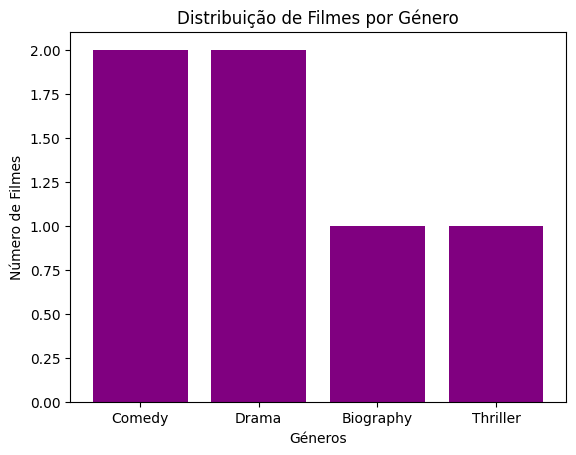

None


In [41]:
import matplotlib.pyplot as plt
def graph(dist): 
    plt.figure()
    plt.bar(dist.keys(), dist.values(), color="purple")
    plt.xticks([x for x in range(0, len(dist.keys()))], dist.keys())
    plt.ylabel("Número de Filmes", rotation= 'vertical')
    plt.xlabel("Géneros")
    plt.title("Distribuição de Filmes por Género")
    plt.show()
print(graph(filmePorGenero(CineUM)))